<a href="https://colab.research.google.com/github/seunghwan1228/Titanic/blob/master/8)_Titanic_ML_part_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model Candidates are

* RandomForest
* KNN
* soft_voting - Randomforest / XGBoost
* soft_voting - Randomforest / XGBoost / Nueral Net

* +) ensemble these five models - stacking
 - mutiple models' output (prediction) become input to another model

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

from keras import models, layers
from keras.losses import binary_crossentropy
from keras import callbacks
from keras.wrappers.scikit_learn import KerasClassifier

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PRCurve
from yellowbrick.classifier import roc_auc
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

Using TensorFlow backend.


# 0) pre_steps

In [0]:
train = pd.read_csv('/content/drive/input/Titanic/working_dir/train_final.csv')

In [0]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,Survived
0,-0.502445,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.786845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.488854,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.420730,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,-0.486337,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [0]:
y = train.Survived
X = train.drop('Survived', axis=1)

In [0]:
print(X.shape)
print(y.shape)

(891, 29)
(891,)


This time, split 70 / 30 with random_state1228 and shuffle the dataset 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1228, shuffle = True)

In [0]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(623, 29) (623,)
(268, 29) (268,)


# 0-1) Load test set and submission file

In [0]:
hold_out_set = pd.read_csv('/content/drive/input/Titanic/working_dir/test_final.csv')

In [0]:
hold_out_set.shape

(418, 29)

In [0]:
hold_out_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-0.497311,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.512175,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.463999,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.482373,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.417392,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [0]:
submission_file = pd.read_csv('/content/drive/input/Titanic/gender_submission.csv')

In [0]:
submission_file.shape

(418, 2)

In [0]:
submission_file.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# 1) RandomForest 

In [0]:
rnd_clf = RandomForestClassifier(random_state=42)

In [0]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
rnd_clf.score(X_train, y_train)

0.9341894060995185

In [0]:
rnd_clf.score(X_test, y_test)

0.8246268656716418

In [0]:
y_pred = rnd_clf.predict(X_train)

In [0]:
y_proba = rnd_clf.predict_proba(X_train)

In [0]:
confusion_matrix(y_train, y_pred)

array([[362,  18],
       [ 23, 220]])

In [0]:
clf_report = classification_report(y_train, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       380
           1       0.92      0.91      0.91       243

    accuracy                           0.93       623
   macro avg       0.93      0.93      0.93       623
weighted avg       0.93      0.93      0.93       623



Precision : classified as 1, the probability of classified correctly

Recall : among the true 1, probability of classified 1 correctly

In [0]:
pr, rc, threshold = precision_recall_curve(y_train, y_proba[:, 1])

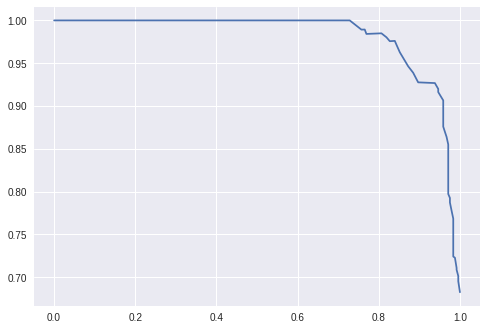

In [0]:
plt.plot(rc, pr)

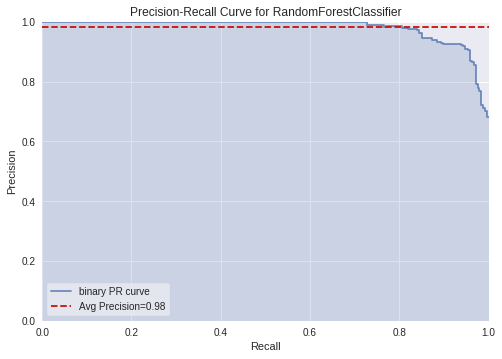

In [0]:
pr_visualizer = PRCurve(rnd_clf)
pr_visualizer.fit(X_train, y_train)
pr_visualizer.score(X_train, y_train)
pr_visualizer.poof()

ROC-AUC

In [0]:
roc_auc_score(y_train, y_proba[:,1])

0.9868637643491445

In [0]:
fpr_rnd, tpr_rnd, threshold_rnd = roc_curve(y_train, y_proba[:, 1])

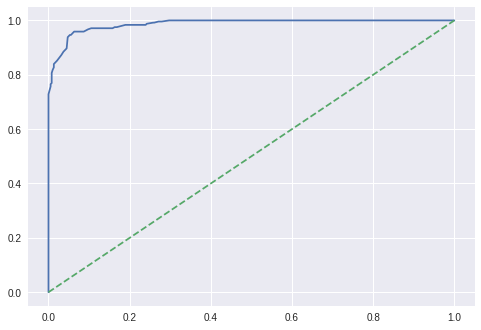

In [0]:
plt.plot(fpr_rnd, tpr_rnd)
plt.plot([0,1], [0,1], '--')

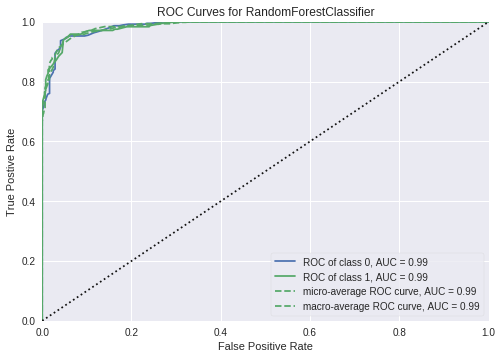

In [0]:
roc_visualizer = ROCAUC(rnd_clf)
roc_visualizer.fit(X_train, y_train)
roc_visualizer.score(X_train, y_train)
roc_visualizer.poof()

## Tunning model  - RandomForest Classifier

In [0]:
mod_rnd = RandomForestClassifier(random_state=42)

params = {'n_estimators' : np.arange(10, 1001, 20), 
          'max_depth' : np.arange(2, 21, 2),
          'min_samples_split' : [2,4,5,7], 
          'min_samples_leaf' : [1,2,4,5],
          'max_features' : ['auto', 'log2']
          }

In [0]:
rnd_grid = GridSearchCV(mod_rnd, param_grid=params, cv = 3, n_jobs=-1, verbose=1)

In [0]:
mod_rnd.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [0]:
rnd_grid.fit(X_train, y_train)

Fitting 3 folds for each of 16000 candidates, totalling 48000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed: 49.6min
[Parallel(n_jobs=-1)]: Done 11246 tasks      |

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 4, 5, 7],
                         'n_estimators'

In [0]:
rnd_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
rnd_grid.best_score_

0.8218298555377207

In [0]:
rnd_grid.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 10}

In [0]:
rnd_grid.cv_results_

In [0]:
rnd_best = rnd_grid.best_estimator_

In [0]:
rnd_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
rnd_best.score(X_train, y_train)

0.85553772070626

In [0]:
rnd_best.score(X_test, y_test)

0.8395522388059702

In [0]:
y_best_prd = rnd_best.predict(X_train)

In [0]:
confusion_matrix(y_train, y_best_prd)

array([[358,  22],
       [ 68, 175]])

In [0]:
clf_report_best = classification_report(y_train, y_best_prd)
print(clf_report_best)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       380
           1       0.89      0.72      0.80       243

    accuracy                           0.86       623
   macro avg       0.86      0.83      0.84       623
weighted avg       0.86      0.86      0.85       623



In [0]:
y_best_proba = rnd_best.predict_proba(X_train)

In [0]:
pr_best, rc_best, threshold_best = precision_recall_curve(y_train, y_best_proba[:, 1])

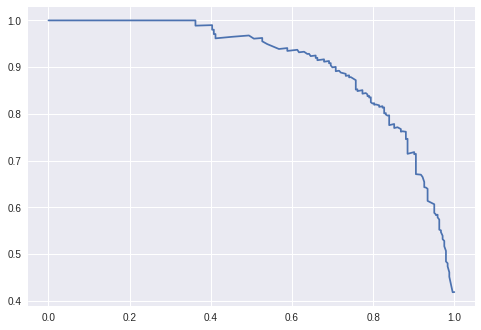

In [0]:
plt.plot(rc_best, pr_best)

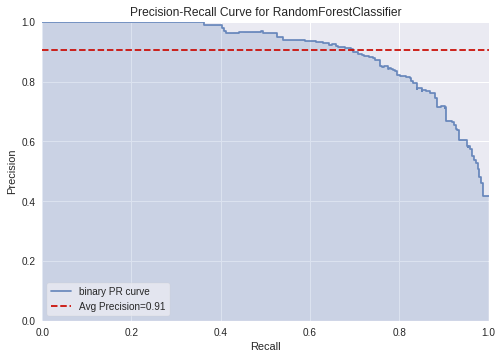

In [0]:
pr_visualizer = PRCurve(rnd_best)
pr_visualizer.fit(X_train, y_train)
pr_visualizer.score(X_train, y_train)
pr_visualizer.poof()

ROC-AUC

In [0]:
roc_auc_score(y_train, y_best_proba[:,1])

0.9232672731210742

In [0]:
fpr_rnd_best, tpr_rnd_best, threshold_rnd_best = roc_curve(y_train, y_best_proba[:, 1])

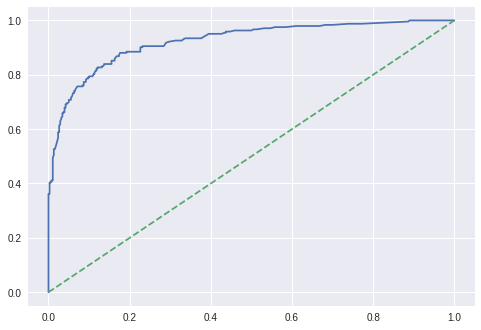

In [0]:
plt.plot(fpr_rnd_best, tpr_rnd_best)
plt.plot([0,1], [0,1], '--')

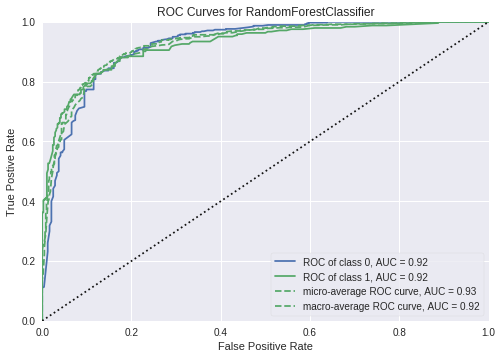

In [0]:
# train set
roc_visualizer = ROCAUC(rnd_best)
roc_visualizer.fit(X_train, y_train)
roc_visualizer.score(X_train, y_train)
roc_visualizer.poof()

### KFold cv

In [0]:
kfold = KFold(n_splits = 5, shuffle=True, random_state = 1228)

In [0]:
rnd_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
five_fold_cv = cross_val_score(rnd_best, X_train, y_train, cv = kfold)

print(five_fold_cv)
print(np.mean(five_fold_cv))

[0.8        0.824      0.76       0.83064516 0.84677419]
0.812283870967742


In [0]:
five_fold_cv = cross_val_score(rnd_best, X_test, y_test, cv = kfold)

print(five_fold_cv)
print(np.mean(five_fold_cv))

[0.72222222 0.83333333 0.87037037 0.9245283  0.77358491]
0.824807826694619


### Prediction

In [0]:
rnd_final_pred = rnd_best.predict(hold_out_set)

In [0]:
rnd_final_pred

In [0]:
submission_file['Survived_rnd'] = rnd_final_pred

In [0]:
submission_file.head()

,PassengerId,Survived,Survived_rnd
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1


In [0]:
submission_file['Survived'] = rnd_final_pred

In [0]:
# submission_file.to_csv('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/rnd_best_pred.csv')

In [0]:
submit = pd.read_csv('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/rnd_best_pred.csv')

In [0]:
submit.drop('Unnamed: 0', axis = 1, inplace=True)

In [0]:
submit.to_csv('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/rnd_best_pred.csv', index=False)

## Result : RandomForest : 0.77033



# 2) KNN

In [0]:
knn_clf = KNeighborsClassifier()

In [0]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
knn_clf.score(X_train, y_train)

0.8603531300160514

In [0]:
knn_clf.score(X_test, y_test)

0.8246268656716418

In [0]:
y_pred = knn_clf.predict(X_train)
y_pred_proba = knn_clf.predict_proba(X_train)

In [0]:
confusion_matrix(y_train, y_pred)

array([[341,  39],
       [ 48, 195]])

In [0]:
knn_clf_report = classification_report(y_train, y_pred)
print(knn_clf_report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       380
           1       0.83      0.80      0.82       243

    accuracy                           0.86       623
   macro avg       0.85      0.85      0.85       623
weighted avg       0.86      0.86      0.86       623



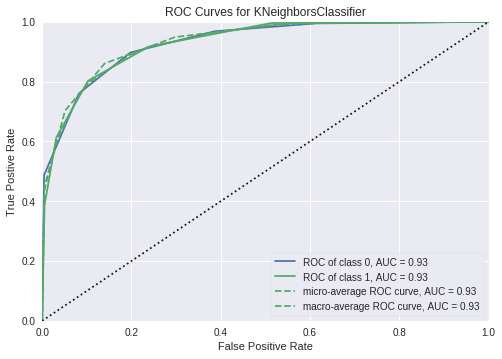

In [0]:
knn_visualizer = ROCAUC(knn_clf)
knn_visualizer.fit(X_train, y_train)
knn_visualizer.score(X_train, y_train)
knn_visualizer.poof()

In [0]:
roc_auc_score(y_train, y_pred_proba[:, 1])

0.9298624648039854

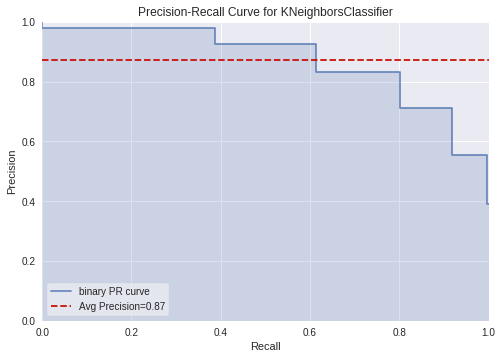

In [0]:
knn_visualizer = PRCurve(knn_clf)
knn_visualizer.fit(X_train,y_train)
knn_visualizer.score(X_train, y_train)
knn_visualizer.poof()

In [0]:
fpr, tpr, threshold = roc_curve(y_train, y_pred_proba[:,1])

Text(0.5, 1.0, 'Comparison')

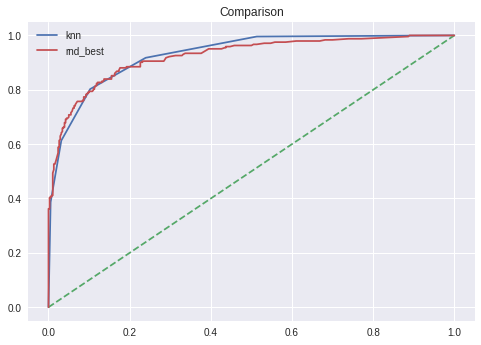

In [0]:
plt.plot(fpr, tpr, label='knn')
plt.plot([0,1], [0,1], '--')
plt.plot(fpr_rnd_best, tpr_rnd_best, label='rnd_best')
plt.legend()
plt.title('Comparison')


## knn-gridsearch

In [0]:
params = {'n_neighbors': np.arange(1,15),
          'weights':['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [0]:
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv = 3)

In [0]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
knn_grid.best_score_

0.797752808988764

In [0]:
knn_best = knn_grid.best_estimator_

In [0]:
knn_best.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [0]:
knn_best.score(X_train, y_train)

0.8539325842696629

In [0]:
knn_best.score(X_test, y_test)

0.832089552238806

In [0]:
knn_y_best_pred = knn_best.predict(X_train)
knn_y_best_prob = knn_best.predict_proba(X_train)

In [0]:
confusion_matrix(y_train, knn_y_best_pred)

array([[361,  19],
       [ 72, 171]])

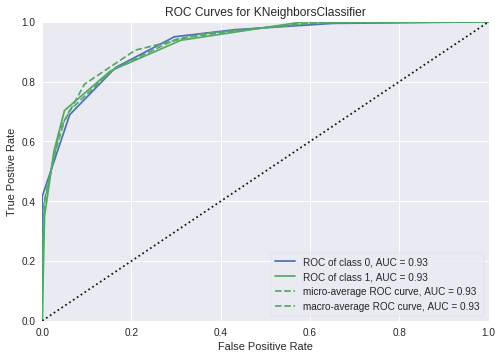

In [0]:
knn_visualizer = ROCAUC(knn_best)
knn_visualizer.fit(X_train, y_train)
knn_visualizer.score(X_train, y_train)
knn_visualizer.poof()

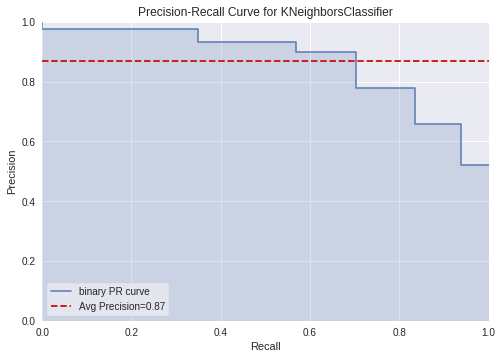

In [0]:
knn_visualizer = PRCurve(knn_best)
knn_visualizer.fit(X_train,y_train)
knn_visualizer.score(X_train, y_train)
knn_visualizer.poof()

In [0]:
knn_best_fpr, knn_best_tpr, knn_best_threshold = roc_curve(y_train, knn_y_best_prob[:, 1])

Text(0.5, 1.0, 'Comparison')

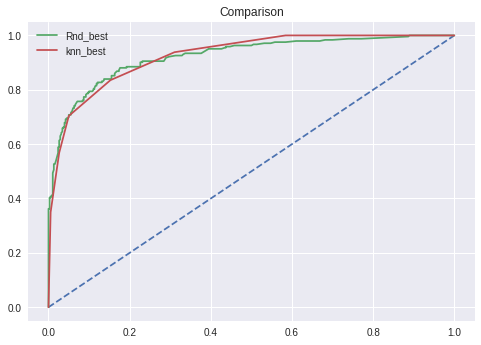

In [0]:
# plt.plot(fpr, tpr, label='knn')
plt.plot([0,1], [0,1], '--')
plt.plot(fpr_rnd_best, tpr_rnd_best, label='Rnd_best')
plt.plot(knn_best_fpr, knn_best_tpr, label='knn_best')
plt.legend()
plt.title('Comparison')

### prediction

In [0]:
submission_file.head()

,PassengerId,Survived,Survived_rnd
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1


In [0]:
knn_result = knn_best.predict(hold_out_set)

In [0]:
knn_result

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
submission_file['Survived_knn'] = knn_result

In [0]:
submission_file.head()

,PassengerId,Survived,Survived_rnd,Survived_knn
0,892,0,0,0
1,893,1,1,0
2,894,0,0,0
3,895,0,0,0
4,896,1,1,0


In [0]:
submission_file[['PassengerId', 'Survived_knn']].to_csv('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/knn_best_pred.csv', index=False)

## Result KNN : 0.75119

# 3-0) To perfome ensemble, create XGBclassifier with the best performance

In [0]:
xgb_clf = XGBClassifier()

In [0]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_clf.score(X_train, y_train)

0.8747993579454254

In [0]:
xgb_clf.score(X_test, y_test)

0.832089552238806

In [0]:
y_pred = xgb_clf.predict(X_train)
y_prob = xgb_clf.predict_proba(X_train)

In [0]:
confusion_matrix(y_train, y_pred)

array([[353,  27],
       [ 51, 192]])

In [0]:
xgb_clf_report = classification_report(y_train, y_pred)
print(xgb_clf_report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       380
           1       0.88      0.79      0.83       243

    accuracy                           0.87       623
   macro avg       0.88      0.86      0.87       623
weighted avg       0.87      0.87      0.87       623



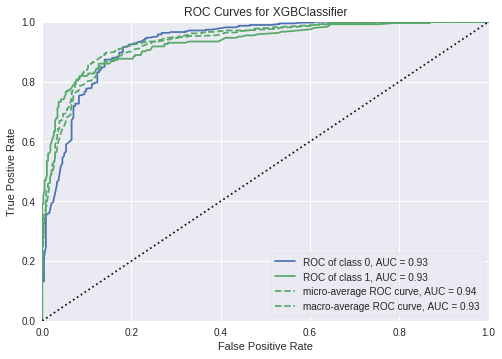

In [0]:
visualizer = ROCAUC(xgb_clf)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.poof()

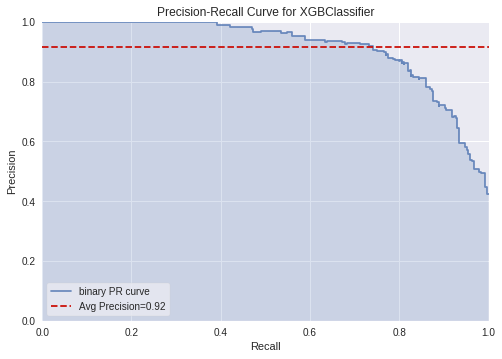

In [0]:
visualizer = PRCurve(xgb_clf)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.poof()

In [0]:
xgb_clf.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

XGB gridsearch

In [0]:
params = {'max_depth' : np.arange(3,15, 2),
          'booster' : ['gbtree', 'gblinear', 'dart'],
          'n_estimators': np.arange(100, 1001, 50),
          'gamma':[0.01, 0.1, 1., 10.],
          'importance_type': ["gain","weight", "cover", "total_gain", "total_cover"],
          'reg_alpha':[0., 0.5, 1.],
          'reg_lambda':[0.,0.5, 1.]
         }

In [0]:
xgb_grid = RandomizedSearchCV(XGBClassifier(random_state=1228), param_distributions=params, cv = 3, verbose=1, n_jobs=-1, n_iter=2500)

In [0]:
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 2500 candidates, totalling 7500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 43.3min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 55.7min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 86.4min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 103.2min
[Parallel(n_jobs=-1)]: Done 7500 out of 7500 | elapsed: 106.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=1228, reg_alph...
                                        'importance_type': ['gain', 'weight',
                                                            'cover',
                                                            'total_gain',
 

In [0]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1.0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=750, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1228,
              reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_grid.best_params_

{'booster': 'gbtree',
 'gamma': 1.0,
 'importance_type': 'gain',
 'max_depth': 7,
 'n_estimators': 750,
 'reg_alpha': 0.5,
 'reg_lambda': 1.0}

In [0]:
xgb_grid.best_score_

0.8234349919743178

In [0]:
xgb_best = xgb_grid.best_estimator_

In [0]:
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1.0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=750, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1228,
              reg_alpha=0.5, reg_lambda=1.0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_best.score(X_train, y_train)

0.8876404494382022

In [0]:
xgb_best.score(X_test, y_test)

0.8395522388059702

In [0]:
y_pred = xgb_best.predict(X_train)
y_prob = xgb_best.predict_proba(X_train)

In [0]:
confusion_matrix(y_train, y_pred)

array([[361,  19],
       [ 51, 192]])

In [0]:
xgb_clf_report = classification_report(y_train, y_pred)
print(xgb_clf_report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       380
           1       0.91      0.79      0.85       243

    accuracy                           0.89       623
   macro avg       0.89      0.87      0.88       623
weighted avg       0.89      0.89      0.89       623



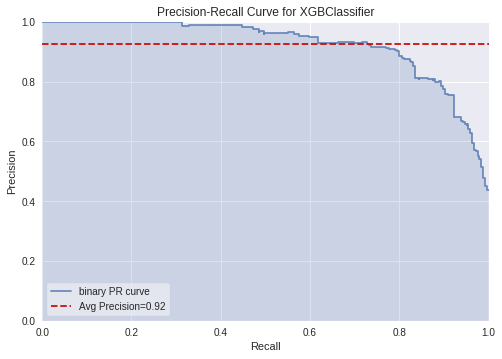

In [0]:
visualizer = PRCurve(xgb_best)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.poof()

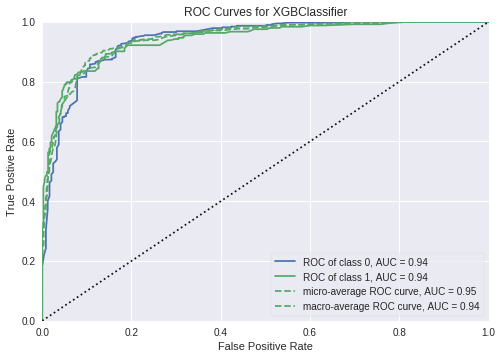

In [0]:
visualizer = ROCAUC(xgb_best)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.poof()

In [0]:
xgb_result = xgb_best.predict(hold_out_set)

In [0]:
xgb_result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
xgb_best_pred = submission_file.copy()
xgb_best_pred['Survived'] = xgb_result

In [0]:
# xgb_best_pred.to_csv('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/xgb_best_pred.csv', index=False)

## Result XGB : 0.74162

# 3-1) Soft voting - RandomForest & XGB

In [0]:
# RandomForest Best Estimators
{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 10}

# XGB Best Estimators
{'booster': 'gbtree',
 'gamma': 1.0,
 'importance_type': 'gain',
 'max_depth': 7,
 'n_estimators': 750,
 'reg_alpha': 0.5,
 'reg_lambda': 1.0}

In [0]:
rnd_vote = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2, min_samples_split=7, n_estimators=10, random_state=1228)
xgb_vote = XGBClassifier(booster='gbtree', gamma=1.0, max_depth=7, n_estimators=750, reg_alpha=0.5, reg_lambda=1.0, random_state=1228)

In [0]:
vote_clf = VotingClassifier(estimators=[('rnd_vote', rnd_vote), 
                                        ('xgb_vote', xgb_vote)],
                            voting = 'soft')

In [0]:
vote_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rnd_vote',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=10,
                                                     max_features='log2',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=7,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=10,
                                                     n_jobs=None,
       

In [0]:
vote_clf.score(X_train, y_train)

0.8796147672552167

In [0]:
vote_clf.score(X_test, y_test)

0.832089552238806

In [0]:
y_pred = vote_clf.predict(X_train)
y_prob = vote_clf.predict_proba(X_train)

In [0]:
confusion_matrix(y_train, y_pred)

array([[360,  20],
       [ 55, 188]])

In [0]:
soft_vote_clf_report = classification_report(y_train, y_pred)
print(soft_vote_clf_report)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       380
           1       0.90      0.77      0.83       243

    accuracy                           0.88       623
   macro avg       0.89      0.86      0.87       623
weighted avg       0.88      0.88      0.88       623



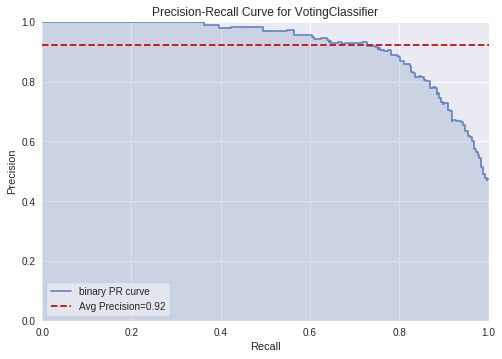

In [0]:
visualizer = PRCurve(vote_clf)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.poof()

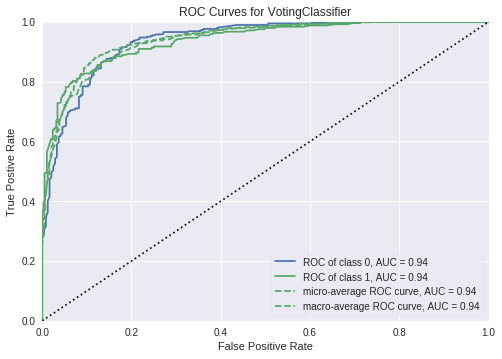

In [0]:
visualizer = ROCAUC(vote_clf)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.poof()

In [0]:
vote_pred = vote_clf.predict(hold_out_set)
vote_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
vote_best_pred = submission_file.copy()
vote_best_pred['Survived'] = vote_pred

In [0]:
# vote_best_pred.to_csv('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/vote_best_pred.csv', index=False)

Result : 0.75119

## Benchmark w/o tunning

In [0]:
rnd_vote_bm = RandomForestClassifier(random_state=1228)
xgb_vote_bm = XGBClassifier(random_state=1228)

vote_bm = VotingClassifier(estimators=[('rnd_vote', rnd_vote_bm),
                                       ('xgb_vote', xgb_vote_bm)],
                          voting='soft')

In [0]:
vote_bm.fit(X_train, y_train)

VotingClassifier(estimators=[('rnd_vote',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators='warn',
                                                     n_jobs=None,
 

In [0]:
vote_bm.score(X_train, y_train)

0.9229534510433387

In [0]:
vote_bm.score(X_test, y_test)

0.8246268656716418

In [0]:
y_pred = vote_bm.predict(X_train)
y_prob = vote_bm.predict_proba(X_train)

In [0]:
confusion_matrix(y_train, y_pred)

array([[362,  18],
       [ 30, 213]])

In [0]:
soft_vote_bm_report = classification_report(y_train, y_pred)
print(soft_vote_bm_report)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       380
           1       0.92      0.88      0.90       243

    accuracy                           0.92       623
   macro avg       0.92      0.91      0.92       623
weighted avg       0.92      0.92      0.92       623



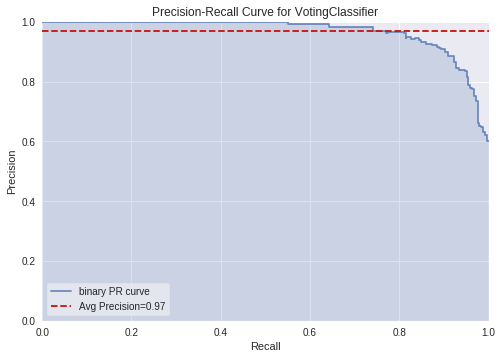

In [0]:
visualizer = PRCurve(vote_bm)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.poof()

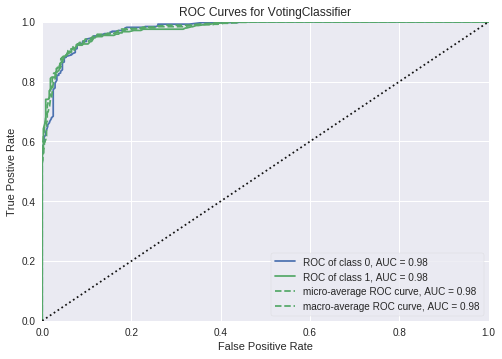

In [0]:
visualizer = ROCAUC(vote_bm)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.poof()

In [0]:
vote_bm_pred = vote_bm.predict(hold_out_set)
vote_bm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
vote_bm_result = submission_file.copy()
vote_bm_result['Survived'] = vote_bm_pred

In [0]:
# vote_bm_result.to_csv('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/vote_bm_pred.csv', index=False)

In [0]:
comparison_df = pd.DataFrame({'benchmark':vote_bm_pred, 'tunned':vote_pred})

In [0]:
comparison_df

In [0]:
comparison_df[comparison_df['benchmark'] != comparison_df['tunned']].sum()

benchmark    11
tunned       11
dtype: int64

## Result : 0.75119

# 4-0) Neural Net for ensemble

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape=(29,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation ='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0619 08:35:08.844535 139990176343936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0619 08:35:08.868563 139990176343936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0619 08:35:08.874566 139990176343936 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
result = model.fit(X_train, y_train, batch_size = 64, epochs=100, validation_data=(X_test, y_test))

W0619 08:36:14.943133 139990176343936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 623 samples, validate on 268 samples
Epoch 1/100
623/623 [==============================] - 4s 7ms/step - loss: 0.6927 - acc: 0.5201 - val_loss: 0.6473 - val_acc: 0.7015
Epoch 2/100
623/623 [==============================] - 0s 96us/step - loss: 0.6356 - acc: 0.6950 - val_loss: 0.5992 - val_acc: 0.7239
Epoch 3/100
623/623 [==============================] - 0s 93us/step - loss: 0.5957 - acc: 0.7111 - val_loss: 0.5592 - val_acc: 0.7388
Epoch 4/100
623/623 [==============================] - 0s 85us/step - loss: 0.5616 - acc: 0.7319 - val_loss: 0.5251 - val_acc: 0.7612
Epoch 5/100
623/623 [==============================] - 0s 89us/step - loss: 0.5321 - acc: 0.7608 - val_loss: 0.4971 - val_acc: 0.7985
Epoch 6/100
623/623 [==============================] - 0s 99us/step - loss: 0.5072 - acc: 0.7865 - val_loss: 0.4756 - val_acc: 0.8060
Epoch 7/100
623/623 [==============================] - 0s 91us/step - loss: 0.4893 - acc: 0.7833 - val_loss: 0.4588 - val_acc: 0.8060
Epoch 8/100
623/6

Text(0.5, 1.0, 'Accuracy')

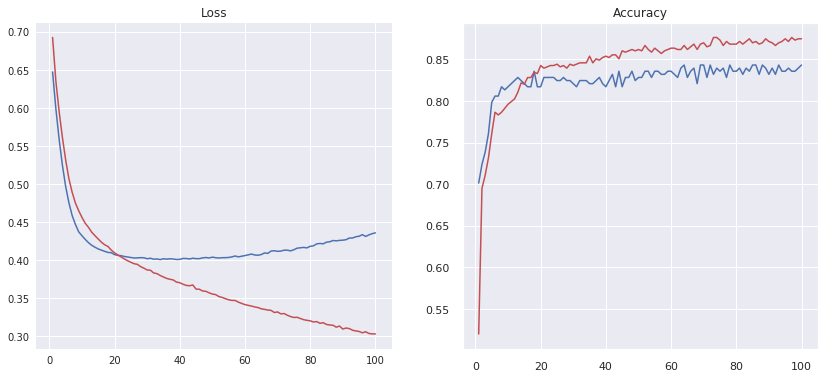

In [0]:
model_history = result.history
epochs = np.arange(1, 101)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set()
plt.plot(epochs, model_history['val_loss'], 'b-', label = 'val_loss')
plt.plot(epochs, model_history['loss'], 'r-', label = 'loss')
plt.title('Loss')

plt.subplot(1,2,2)
sns.set()
plt.plot(epochs, model_history['val_acc'], 'b-', label = 'val_loss')
plt.plot(epochs, model_history['acc'], 'r-', label = 'loss')
plt.title('Accuracy')

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape=(29,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation ='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
final_mod = model.fit(X_train, y_train, batch_size=64, epochs=1, validation_data=(X_test, y_test)) # run each epoch with comparing val_loss to minimize and save it

Train on 623 samples, validate on 268 samples
Epoch 1/1
623/623 [==============================] - 0s 94us/step - loss: 0.3556 - acc: 0.8620 - val_loss: 0.4032 - val_acc: 0.8246


In [0]:
# model.save('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/nn_final.h5')

In [0]:
getting_model = models.load_model('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/nn_final.h5')

In [0]:
getting_model

In [0]:
getting_model.evaluate(X_train, y_train)

623/623 [==============================] - 0s 233us/step


[0.3800432966666275, 0.8459069023736981]

In [0]:
getting_model.evaluate(X_test, y_test)

268/268 [==============================] - 0s 98us/step


[0.4006118861152165, 0.832089552238806]

In [0]:
y_pred = getting_model.predict_classes(X_train)
y_prob = getting_model.predict_proba(X_train)

In [0]:
confusion_matrix(y_train, y_pred)

array([[349,  31],
       [ 65, 178]])

In [0]:
nn_clf_report = classification_report(y_train, y_pred)
print(nn_clf_report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       380
           1       0.85      0.73      0.79       243

    accuracy                           0.85       623
   macro avg       0.85      0.83      0.83       623
weighted avg       0.85      0.85      0.84       623



In [0]:
fpr, tpr, threshold = roc_curve(y_train, y_prob)

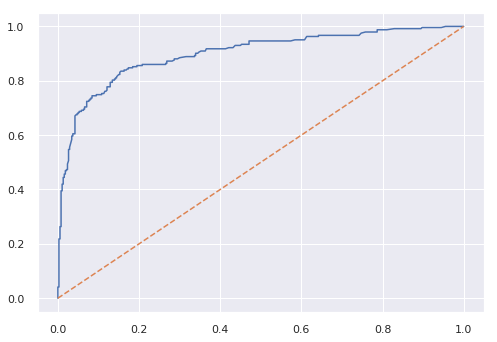

In [0]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')

In [0]:
roc_auc_score(y_train, y_prob)

0.8989387047866579

In [0]:
y_pred = getting_model.predict_classes(hold_out_set.values)

In [0]:
y_pred_nn = y_pred.ravel()
y_pred_nn

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [0]:
nn_best_pred = submission_file.copy()
nn_best_pred['Survived'] = y_pred_nn

In [0]:
# nn_best_pred.to_csv('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/nn_best_pred.csv', index=False)

## Result : 0.78468

# 4-1) Ensemble  Neural Net  / RandomForest / XGBClassifier

In [0]:
nn_model = models.load_model('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/nn_final.h5')

W0619 12:08:59.456144 140061252183936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 12:08:59.503252 140061252183936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 12:08:59.566198 140061252183936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0619 12:08:59.567384 140061252183936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0619 12:08:59.569145 140061252183936 depre

In [0]:
def load_nn_model():
  nn_model = models.load_model('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/nn_final.h5')
  return nn_model

In [0]:
keras_model = KerasClassifier(load_nn_model)
rnd_vote = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2, min_samples_split=7, n_estimators=10, random_state=1228)
xgb_vote = XGBClassifier(booster='gbtree', gamma=1.0, max_depth=7, n_estimators=750, reg_alpha=0.5, reg_lambda=1.0, random_state=1228)

In [0]:
ensemble = VotingClassifier(estimators=[('nn', keras_model),
                                        ('rnd', rnd_vote),
                                        ('xgb', xgb_vote)],
                           voting='soft')

In [0]:
ensemble.fit(X_train, y_train)

Epoch 1/1
623/623 [==============================] - 1s 2ms/step - loss: 0.3819 - acc: 0.8411


VotingClassifier(estimators=[('nn',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f62210d7fd0>),
                             ('rnd',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=10,
                                                     max_features='log2',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=2,
                                                     min_samples_split=7,
                                                     min_weight_fraction_leaf...
           

In [0]:
y_pred = ensemble.predict(X_train)
y_prob = ensemble.predict_proba(X_train)

In [0]:
ensemble.score(X_train, y_train)

0.8764044943820225

In [0]:
ensemble.score(X_test, y_test)

0.8395522388059702

In [0]:
confusion_matrix(y_train, y_pred)

array([[358,  22],
       [ 55, 188]])

In [0]:
ensemble_clf_report = classification_report(y_train, y_pred)
print(ensemble_clf_report)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       380
           1       0.90      0.77      0.83       243

    accuracy                           0.88       623
   macro avg       0.88      0.86      0.87       623
weighted avg       0.88      0.88      0.87       623



Epoch 1/1
623/623 [==============================] - 0s 432us/step - loss: 0.3854 - acc: 0.8411


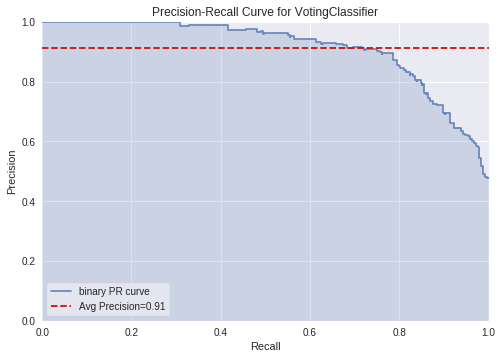

In [0]:
visualizer = PRCurve(ensemble)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.poof()

Epoch 1/1
623/623 [==============================] - 0s 384us/step - loss: 0.3842 - acc: 0.8459


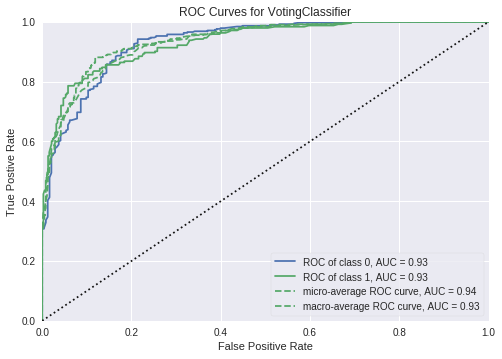

In [0]:
visualizer = ROCAUC(ensemble)
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
visualizer.poof()

In [0]:
ensemble_pred = ensemble.predict(hold_out_set)

In [0]:
ensemble_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
ensemble_result = submission_file.copy()
ensemble_result['Survived'] = ensemble_pred

In [0]:
# ensemble_result.to_csv('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/ensemble_pred.csv', index=False)

## Result : 0.77033

# Extra) Staking 
* RandomForest
* KNN
* soft_voting - Randomforest / XGBoost
* soft_voting - Randomforest / XGBoost / Nueral Net



In [0]:
keras_clf = KerasClassifier(load_nn_model)
rnd_clf = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2, min_samples_split=7, n_estimators=10, random_state=1228)
xgb_clf = XGBClassifier(booster='gbtree', gamma=1.0, max_depth=7, n_estimators=750, reg_alpha=0.5, reg_lambda=1.0, random_state=1228)
knn_clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=6, p=2, weights='uniform')


In [0]:
model_1 = rnd_clf
model_2 = knn_clf
model_3 = VotingClassifier(estimators=[('rnd', rnd_clf), ('xgb', xgb_clf)], voting='soft')
model_4 = VotingClassifier(estimators=[('rnd', rnd_clf), ('xgb', xgb_clf), ('nn', keras_clf)], voting='soft')

In [0]:
model_list = [model_1, model_2, model_3, model_4]

In [0]:
y_result = []
for model in model_list:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_train)
  y_result.append(y_pred)


Epoch 1/1
623/623 [==============================] - 0s 411us/step - loss: 0.3822 - acc: 0.8475


In [0]:
y_result

y_result_df = pd.DataFrame(y_result).transpose()



In [0]:
stack_rnd_clf = RandomForestClassifier(random_state=1228)

In [0]:
stack_rnd_clf.fit(y_result_df.values, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1228,
                       verbose=0, warm_start=False)

In [0]:
stack_rnd_clf.score(y_result_df.values, y_train)

0.8828250401284109

In [0]:
def load_nn_model():
  nn_model = models.load_model('/content/drive/Colab Notebooks/Python Practice/Titanic Disaster/Working Directory/nn_final.h5')
  return nn_model




def stacking(X_train, y_train, predict_data=X_train, predict_label=X_test, final_model=RandomForestClassifier(random_state=1228)):
  """set the models"""
  keras_clf = KerasClassifier(load_nn_model)
  rnd_clf = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2, min_samples_split=7, n_estimators=10, random_state=1228)
  xgb_clf = XGBClassifier(booster='gbtree', gamma=1.0, max_depth=7, n_estimators=750, reg_alpha=0.5, reg_lambda=1.0, random_state=1228)
  knn_clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=6, p=2, weights='uniform')
  
  model_1 = rnd_clf
  model_2 = knn_clf
  model_3 = VotingClassifier(estimators=[('rnd', rnd_clf), ('xgb', xgb_clf)], voting='soft')
  model_4 = VotingClassifier(estimators=[('rnd', rnd_clf), ('xgb', xgb_clf), ('nn', keras_clf)], voting='soft')
  
  model_list = [model_1, model_2, model_3, model_4]
  
  """fiting first layer"""
  y_result = []
  for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(predict_data)
    
    y_result.append(y_pred)
  
  
  y_result_df = pd.DataFrame(y_result).transpose()
  stack_X = y_result_df.values
  
  """using stack result """
  final_model.fit(stack_X, predict_label)
  #stack_score = final_model.score(stack_X, predict_label)
  y_final_pred = final_model.predict(stack_X)
  return y_final_pred

In [0]:
y_stack_pred = stacking(X_train,y_train,X_train, y_train)

Epoch 1/1
623/623 [==============================] - 0s 472us/step - loss: 0.3836 - acc: 0.8443


In [0]:
accuracy_score(y_train, y_stack_pred)

0.8812199036918138

In [0]:
y_stack_test = stacking(X_train, y_train, X_test, y_test)

Epoch 1/1
623/623 [==============================] - 0s 504us/step - loss: 0.3812 - acc: 0.8459


In [0]:
accuracy_score(y_test, y_stack_test)

0.8544776119402985